In [17]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import import_ipynb
import preprocessing
from sklearn.ensemble import IsolationForest
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [18]:
data=preprocessing.df

In [19]:
data.shape

(247302, 30)

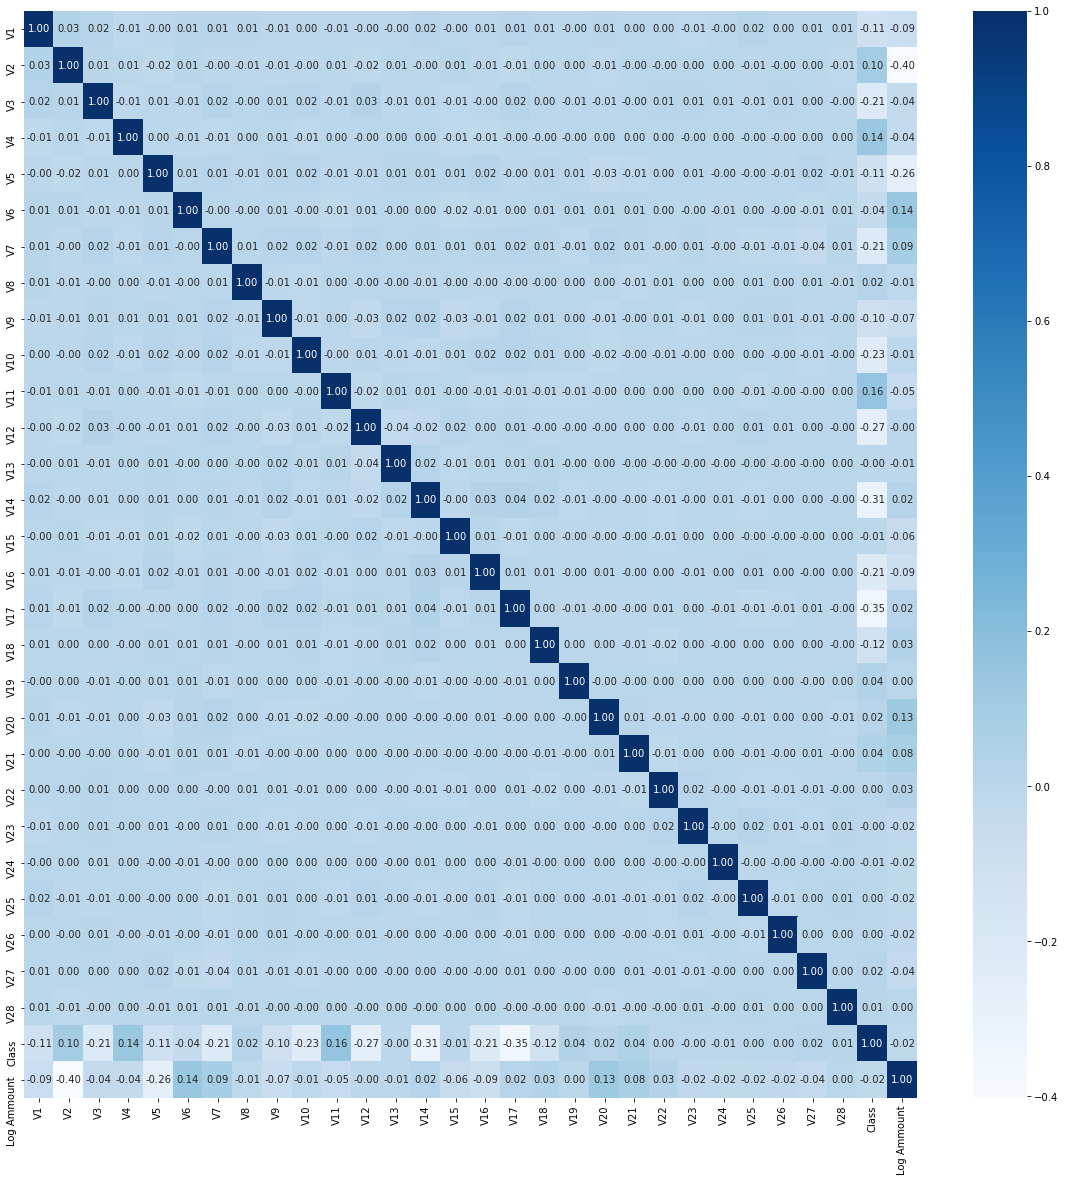

In [20]:
corr=data.corr(method='pearson')
plt.figure(figsize=(20,20))
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 10}, fmt = '.2f', square = False, cmap = 'Blues')


In [21]:
#class와 제일 연관있는 column은 V17,V14이다.

In [22]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [23]:
normal=data[data['Class']==0]
fraud=data[data['Class']==1]

In [24]:
l,u=outlier_treatment(normal.V14)

In [25]:
normal[ (normal.V14 > u) | (normal.V14 < l) ]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Log Ammount
82,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,6.051521,...,-0.852309,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,0.0,0.379121
102,0.298503,2.142722,-1.542143,1.561332,0.938108,-2.145673,1.405569,-0.778459,0.328636,0.127497,...,-0.290987,-0.000235,0.092174,0.586205,-0.397314,-0.480949,0.251145,-0.242279,0.0,-0.247180
104,-1.766645,2.352984,-0.009955,-0.363736,1.460953,-0.204833,0.905819,-3.384123,0.388546,0.791069,...,1.964253,-0.883218,-0.247698,-0.758606,0.086450,0.202790,-0.898858,-0.944337,0.0,-0.273122
108,1.162281,1.248178,-1.581317,1.475024,1.138357,-1.020373,0.638387,-0.136762,-0.805505,-1.444036,...,-0.124012,-0.227150,-0.199185,-0.289757,0.776244,-0.283950,0.056747,0.084706,0.0,0.001000
146,-5.285971,4.847323,-1.290368,-1.427842,-0.621533,-0.604691,0.437866,0.336384,3.558373,6.427802,...,-0.923604,-1.171187,0.150872,-0.493322,1.050554,0.194865,2.490503,1.575380,0.0,2.191765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247220,2.052292,0.552311,-2.405397,0.768905,0.513964,-1.789287,0.341663,-0.379761,0.586866,-1.184661,...,0.087759,0.433487,-0.049242,-0.252172,0.249555,-0.097167,0.016823,0.006161,0.0,0.001000
247223,1.928857,-0.355738,-1.375372,1.033518,-0.474929,-0.840759,-0.459535,-0.128300,-0.288699,0.095288,...,-0.399850,-0.652009,0.173624,-0.351364,-0.211825,-0.668893,0.081961,0.027439,0.0,4.317501
247236,1.899346,0.785212,-2.742960,1.583528,1.166841,-1.065790,0.500420,-0.248132,-0.274647,-1.034337,...,0.124461,0.452065,-0.167596,-0.744824,0.343759,-0.421852,0.043217,0.023111,0.0,3.832135
247238,2.109537,-0.788555,-1.381202,-0.688160,-0.559204,-0.524953,-0.919375,-0.052975,0.110759,0.069870,...,0.229008,0.634052,0.077656,0.368036,-0.110827,-0.107419,0.015979,-0.002501,0.0,3.910041


In [26]:
normal_outlier_index=normal[ (normal.V14 > u) | (normal.V14 < l) ].index

In [27]:
len(normal_outlier_index)

12482

In [28]:
l_f,u_f=outlier_treatment(fraud.V14)

In [29]:
fraud[ (fraud.V14 > u_f) | (fraud.V14 < l_f) ]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Log Ammount
8296,-2.125490,5.973556,-11.034727,9.007147,-1.689451,-2.854415,-7.810441,2.030870,-5.902828,-12.840934,...,1.646518,-0.278485,-0.664841,-1.164555,1.701796,0.690806,2.119749,1.108933,1.0,0.001000
8615,-3.891192,7.098916,-11.426467,8.607557,-2.065706,-2.985288,-8.138589,2.973928,-6.272790,-13.193415,...,1.757085,-0.189709,-0.508629,-1.189308,1.188536,0.605242,1.881529,0.875260,1.0,0.001000
9035,-2.589617,7.016714,-13.705407,10.343228,-2.954461,-3.055116,-9.301289,3.349573,-5.654212,-11.853867,...,1.887738,0.333998,0.287659,-1.186406,-0.690273,0.631704,1.934221,0.789687,1.0,0.001000
9252,-5.454362,8.287421,-12.752811,8.594342,-3.106002,-3.179949,-9.252794,4.245062,-6.329801,-13.136698,...,1.846165,-0.267172,-0.310804,-1.201685,1.352176,0.608425,1.574715,0.808725,1.0,0.001000
9487,-4.153014,8.204797,-15.031714,10.330100,-3.994426,-3.250013,-10.415698,4.620804,-5.711248,-11.797181,...,1.976988,0.256510,0.485908,-1.198821,-0.526567,0.634874,1.627209,0.723235,1.0,0.001000
41943,-2.140511,4.104871,-8.996859,4.028391,-5.131359,-4.153568,-9.360095,1.922075,-4.026180,-13.691315,...,1.854267,-0.165534,-0.339939,0.296314,1.364225,-0.518996,2.352333,1.130625,1.0,-0.273122


In [30]:
fraud_outlier_index=fraud[ (fraud.V14 > u_f) | (fraud.V14 < l_f) ].index

In [31]:
print(len(normal_outlier_index),len(fraud_outlier_index))

12482 6


In [32]:
outlier_index=np.concatenate([normal_outlier_index, fraud_outlier_index])

In [34]:
len(outlier_index)

12488

In [35]:
def pca_3d(X_data,outlier_index):
    pca = PCA(n_components=3) 
    scaler = StandardScaler()

    X = scaler.fit_transform(X_data)
    X_reduce = pca.fit_transform(X)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_zlabel("x_composite_3")

    ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")

    ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
    ax.legend()
    plt.show()


In [36]:
def pca_2d(X_data,outlier_index):
    pca = PCA(2)
    pca.fit(X_data)
    res=pd.DataFrame(pca.transform(X_data))
    Z = np.array(res)
    plt.title("IsolationForest")

    b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
    b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
    plt.legend(loc="upper right")
    plt.show()

In [37]:
X_data=data.iloc[:,:28]
X_data['Log amount']=data.iloc[:,29]
Y_data=data.iloc[:,28]

/home/sumin816/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


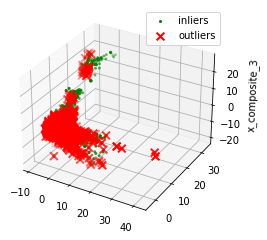

In [38]:
pca_3d(X_data,outlier_index)

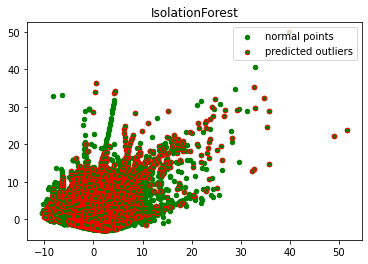

In [39]:
pca_2d(X_data,outlier_index)

In [40]:
X_data.drop(outlier_index,axis=0,inplace=True)
Y_data.drop(outlier_index,axis=0,inplace=True)

/home/sumin816/anaconda3/envs/test/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
X_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Log amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008105
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.989913
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936641
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.816249
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.248367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247297,-0.685505,-0.277326,1.900544,-2.213269,-1.031180,0.480324,-0.860361,0.604277,0.579362,0.242419,...,0.084425,0.137453,0.652636,-0.196782,-0.505575,-0.287098,-0.265578,0.520126,0.260147,0.001000
247298,1.458305,-2.117138,-1.147928,-0.809323,-0.950119,0.170753,-0.511248,-0.125501,-0.105532,0.519438,...,0.875969,0.245424,-0.170900,-0.033591,0.047550,-0.518818,-0.469358,-0.054827,0.030833,5.991467
247299,-0.671530,-0.163224,2.050980,-2.010056,-1.249401,-0.033353,-0.663810,0.382260,0.692583,0.044298,...,0.112891,0.121122,0.675433,-0.149557,-0.031065,-0.285669,-0.275729,0.531661,0.275495,2.232270
247300,0.080243,0.914558,-1.144838,0.027907,0.050925,-1.305150,0.813779,0.109938,-0.113518,-1.175737,...,-0.106791,0.362855,0.892885,0.083734,-0.115643,-0.245846,-0.148970,-0.097911,-0.042843,4.445600


In [42]:
X_data=np.array(X_data)
Y_data=np.array(Y_data)

In [43]:
# scaler = StandardScaler()
# X_data = scaler.fit_transform(X_data)

In [44]:
print(Y_data.shape, X_data.shape)

(234814,) (234814, 29)


In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
# from sklearn.model_selection import GridSearchCV

# params = { 'n_estimators' : [10, 100],
#            'max_depth' : [6, 8, 10, 12],
#            'min_samples_leaf' : [8, 12, 18],
#            'min_samples_split' : [8, 16, 20]
#             }

# # RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
# grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
# grid_cv.fit(X_data, Y_data)

# print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
# print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

In [47]:
rf= RandomForestClassifier(n_estimators = 100, 
                                max_depth = 10,
                                min_samples_leaf = 8,
                                min_samples_split = 8,
                                random_state = 0,
                                n_jobs = -1)

In [48]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [49]:
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X_data,Y_data, test_size=0.2, random_state=777, stratify=Y_data)

In [50]:
skf = StratifiedKFold(n_splits=5)
k=5

In [51]:
result_Y_val=[]
result_Y_val_pred=[]
model =  rf

i=0
for train_index,val_index in skf.split(X_train_val,Y_train_val):
    i=i+1
    print(str(i),"번째 cross validation")
    X_train = X_train_val[train_index]
    Y_train = Y_train_val[train_index]  
    X_val = X_train_val[val_index]
    Y_val = Y_train_val[val_index]
    
    sm = SMOTE()
    X_train_oversampled, Y_train_oversampled = sm.fit_sample(X_train, Y_train)
    model.fit(X_train_oversampled, Y_train_oversampled)

    Y_val_pred = rf.predict(X_val)
    result_Y_val.append(Y_val)
    result_Y_val_pred.append(Y_val_pred)



1 번째 cross validation
2 번째 cross validation
3 번째 cross validation
4 번째 cross validation
5 번째 cross validation


In [52]:
Y_pred=model.predict(X_test)

In [53]:
def evaluation(Y_test,y_pred):
    acc= accuracy_score(Y_test,y_pred)
    print("accuracy : {}".format(acc))
    prec= precision_score(Y_test,y_pred)
    print("precision : {}".format(prec))
    rec= recall_score(Y_test,y_pred)
    print("recall: {}".format(rec))
    f1= f1_score(Y_test,y_pred)
    print("F1-Score : {}".format(f1))
    auc_score=roc_auc_score(Y_test,y_pred)
    print("auc_score: {}".format(auc_score))
    

In [54]:
for i in range(k):
    print("{} 번째 cross validation".format(i+1))
    evaluation(result_Y_val[i],result_Y_val_pred[i])
    print("\n")

1 번째 cross validation
accuracy : 0.9996539884485375
precision : 0.9027777777777778
recall: 0.9154929577464789
F1-Score : 0.9090909090909091
auc_score: 0.9576531455399061


2 번째 cross validation
accuracy : 0.9988022358264573
precision : 0.6288659793814433
recall: 0.8714285714285714
F1-Score : 0.7305389221556887
auc_score: 0.9352342857142858


3 번째 cross validation
accuracy : 0.9992547245142401
precision : 0.7362637362637363
recall: 0.9436619718309859
F1-Score : 0.8271604938271604
auc_score: 0.971510977381932


4 번째 cross validation
accuracy : 0.99962736225712
precision : 0.9130434782608695
recall: 0.8873239436619719
F1-Score : 0.9
auc_score: 0.9435819696975959


5 번째 cross validation
accuracy : 0.9994144264040458
precision : 0.8888888888888888
recall: 0.7887323943661971
F1-Score : 0.835820895522388
auc_score: 0.8942728613608099




In [55]:
evaluation(Y_test,Y_pred)

accuracy : 0.9996805996209782
precision : 0.9111111111111111
recall: 0.9213483146067416
F1-Score : 0.9162011173184358
auc_score: 0.9605888221495542


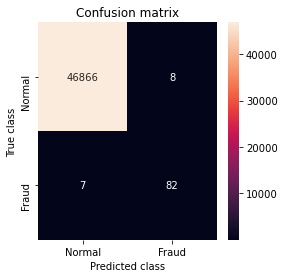

In [56]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
